In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

data = pd.read_csv('airbnb_Boston_rawdata - Revenue.csv')

# Define the continuous, categorical, and binary variables as per the user's instructions
continuous_vars = ['booked_days', 'booked_days_avePrice', 'available_days_aveListedPrice', 'Bedrooms',
                   'available_days', 'Number of Reviews', 'Nightly Rate', 'prev_num_5_star_Rev_pastYear',
                   'Max Guests', 'Bathrooms', 'occupancy_rate', 'numReservedDays_pastYear', 'numReserv_pastYear',
                   'rating_ave_pastYear', 'num_days_as_superhost', 'Cleaning Fee (USD)', 'numReviews_pastYear',
                   'Rating Overall']
categorical_vars = ['Property Type', 'Listing Type']
binary_vars = ['Pets Allowed', 'prev_host_is_superhost_in_period', 'prev_host_is_superhost', 'Superhost',
               'Instantbook Enabled']

# Replace missing values in continuous variables with their median
for var in continuous_vars:
    data[var].fillna(data[var].median(), inplace=True)

# Replace missing values in categorical variables with their mode
for var in categorical_vars:
    data[var].fillna(data[var].mode()[0], inplace=True)

# Prepare the data for linear regression
X = data[continuous_vars + categorical_vars + binary_vars]
y = data['revenue2']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, columns=categorical_vars, drop_first=True)

# Aggregate the data at the Airbnb Host ID level
grouped_data = X.groupby(data['Airbnb Host ID']).agg({
    'booked_days': 'sum',
    'booked_days_avePrice': 'mean',
    'available_days_aveListedPrice': 'mean',
    'Bedrooms': 'mean',
    'available_days': 'sum',
    'Number of Reviews': 'sum',
    'Nightly Rate': 'mean',
    'prev_num_5_star_Rev_pastYear': 'sum',
    'Max Guests': 'mean',
    'Bathrooms': 'mean',
    'occupancy_rate': 'mean',
    'rating_ave_pastYear': 'mean',
    'Cleaning Fee (USD)': 'mean',
    'Rating Overall': 'mean',
    'numReservedDays_pastYear': 'sum',
    'numReserv_pastYear': 'sum',
    'num_days_as_superhost': 'sum',
    'numReviews_pastYear': 'sum',
}).reset_index()

# For binary and categorical variables, take the mode of the highest repeating class
for var in binary_vars:
    mode_values = data.groupby('Airbnb Host ID')[var].agg(lambda x: x.mode()[0])
    grouped_data = grouped_data.join(mode_values, on='Airbnb Host ID')

# Aggregate target variable
grouped_y = data.groupby('Airbnb Host ID')['revenue2'].mean()

# Linear Regression Model
model = LinearRegression()
model.fit(grouped_data, grouped_y)

# Model evaluation
y_pred = model.predict(grouped_data)
mse = mean_squared_error(grouped_y, y_pred)
r2 = r2_score(grouped_y, y_pred)

mse, r2


(6828930.723685551, 0.4147927097350821)

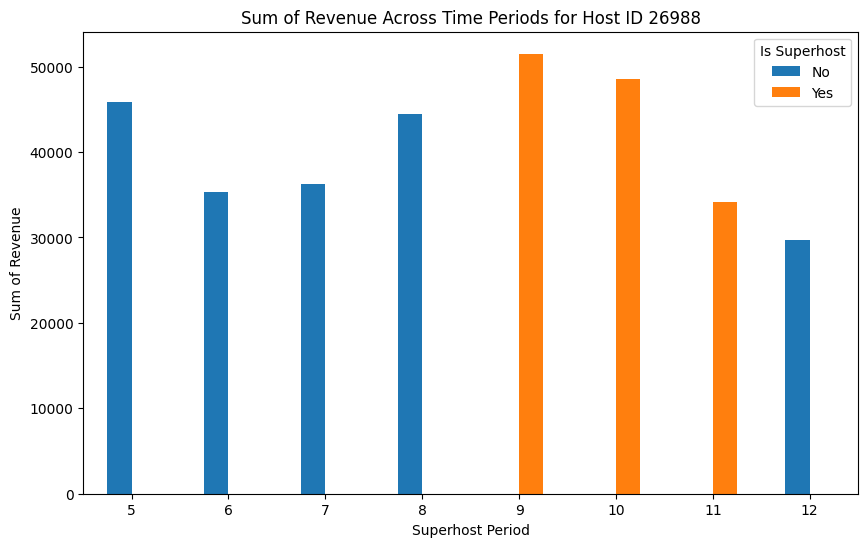

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('airbnb_Boston_rawdata - Revenue.csv')

# Replace missing values in 'revenue' with its mean
df['revenue'] = df['revenue'].fillna(df['revenue'].mean())

# Filter data for Airbnb Host ID 26988
df_host_26988 = df[df['Airbnb Host ID'] == 26988]

# Group by 'superhost_period_all' and 'host_is_superhost_in_period'
# Calculate the sum of revenue for each group
grouped_data = df_host_26988.groupby(['superhost_period_all', 'host_is_superhost_in_period'])['revenue'].sum().reset_index()

# Pivot the data for easy plotting
pivot_data = grouped_data.pivot(index='superhost_period_all', columns='host_is_superhost_in_period', values='revenue')

# Plotting
pivot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Sum of Revenue Across Time Periods for Host ID 26988')
plt.xlabel('Superhost Period')
plt.ylabel('Sum of Revenue')
plt.xticks(rotation=0)
plt.legend(title='Is Superhost', labels=['No', 'Yes'])
plt.show()


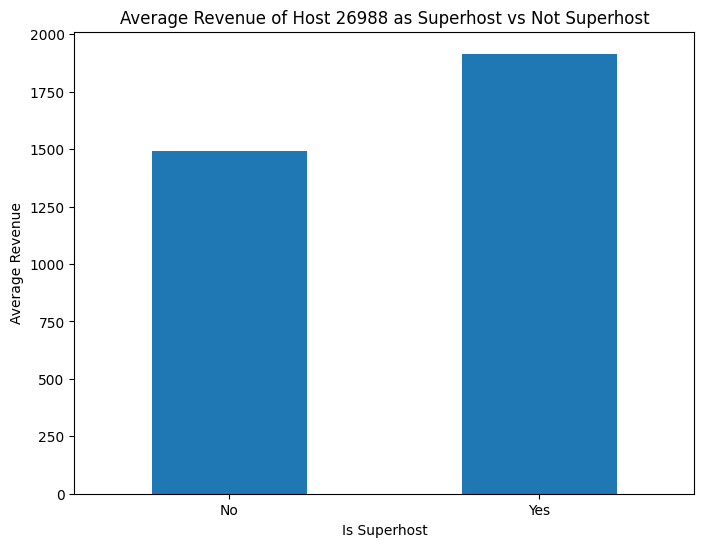

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('airbnb_Boston_rawdata - Revenue.csv')

# Replace missing values in 'revenue' with its mean
df['revenue'] = df['revenue'].fillna(0)

# Filter data for Airbnb Host ID 26988
df_host_26988 = df[df['Airbnb Host ID'] == 26988]

# Group by 'host_is_superhost_in_period' and calculate the average revenue
average_revenue = df_host_26988.groupby('host_is_superhost_in_period')['revenue'].mean()

# Convert to DataFrame for easy plotting
average_revenue_df = average_revenue.reset_index()

# Rename columns for clarity
average_revenue_df.columns = ['Is Superhost', 'Average Revenue']

# Replace values in 'Is Superhost' column for clarity
average_revenue_df['Is Superhost'] = average_revenue_df['Is Superhost'].map({0: 'No', 1: 'Yes'})

# Plotting
average_revenue_df.plot(kind='bar', x='Is Superhost', y='Average Revenue', legend=False, figsize=(8, 6))
plt.title('Average Revenue of Host 26988 as Superhost vs Not Superhost')
plt.xlabel('Is Superhost')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)
plt.show()





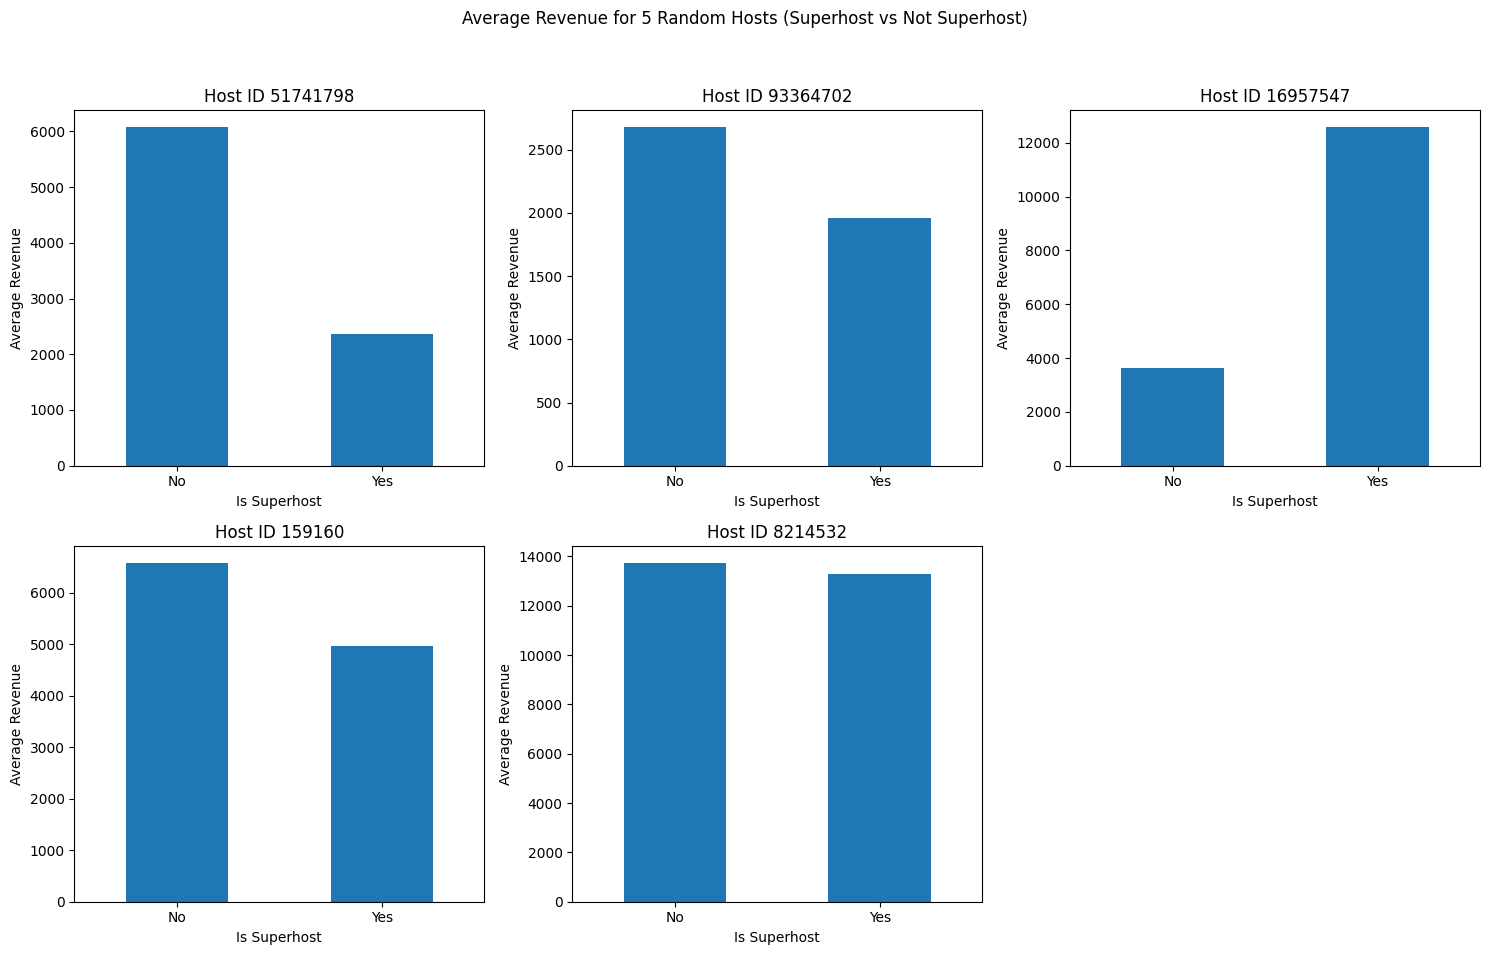

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('airbnb_Boston_rawdata - Revenue.csv')

# Replace missing values in 'revenue' with its mean
df['revenue'] = df['revenue'].fillna(df['revenue'].mean())

# Identify hosts who have been both superhost and not a superhost
superhost_ids = df[df['host_is_superhost_in_period'] == 1]['Airbnb Host ID'].unique()
non_superhost_ids = df[df['host_is_superhost_in_period'] == 0]['Airbnb Host ID'].unique()
both_types_hosts = set(superhost_ids).intersection(set(non_superhost_ids))

# Filter to select only 5 random hosts from this group
random_hosts = np.random.choice(list(both_types_hosts), 5, replace=False)

# Set up the plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.delaxes(axes[1,2])  # Delete the extra subplot
fig.suptitle('Average Revenue for 5 Random Hosts (Superhost vs Not Superhost)')

# Loop through each host and plot the data
for i, host_id in enumerate(random_hosts):
    # Filter data for the current host ID
    df_host = df[df['Airbnb Host ID'] == host_id]

    # Group by 'host_is_superhost_in_period' and calculate the average revenue
    average_revenue = df_host.groupby('host_is_superhost_in_period')['revenue'].mean()

    # Convert to DataFrame for easy plotting
    average_revenue_df = average_revenue.reset_index()

    # Rename columns for clarity
    average_revenue_df.columns = ['Is Superhost', 'Average Revenue']

    # Replace values in 'Is Superhost' column for clarity
    average_revenue_df['Is Superhost'] = average_revenue_df['Is Superhost'].map({0: 'No', 1: 'Yes'})

    # Plotting for each host
    ax = axes[i//3, i%3]
    average_revenue_df.plot(kind='bar', x='Is Superhost', y='Average Revenue', legend=False, ax=ax)
    ax.set_title(f'Host ID {host_id}')
    ax.set_xlabel('Is Superhost')
    ax.set_ylabel('Average Revenue')
    ax.set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()






In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv('airbnb_Boston_rawdata - Revenue.csv')

# Replace missing values in 'revenue' with its mean
df['revenue'] = df['revenue'].fillna(df['revenue'].mean())

# Aggregate revenue at the host and superhost status level
grouped_df = df.groupby(['Airbnb Host ID', 'host_is_superhost_in_period'])['revenue'].mean().reset_index()

# Splitting data into X (features) and y (target)
X = grouped_df[['host_is_superhost_in_period']]  # Independent variable
y = grouped_df['revenue']  # Dependent variable

# Split the data into training and validation sets (70:30)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate R-squared on the validation set
r_squared = r2_score(y_val, y_pred)
print(f"R-squared on Validation Set: {r_squared}")


R-squared on Validation Set: 0.0082939125338517


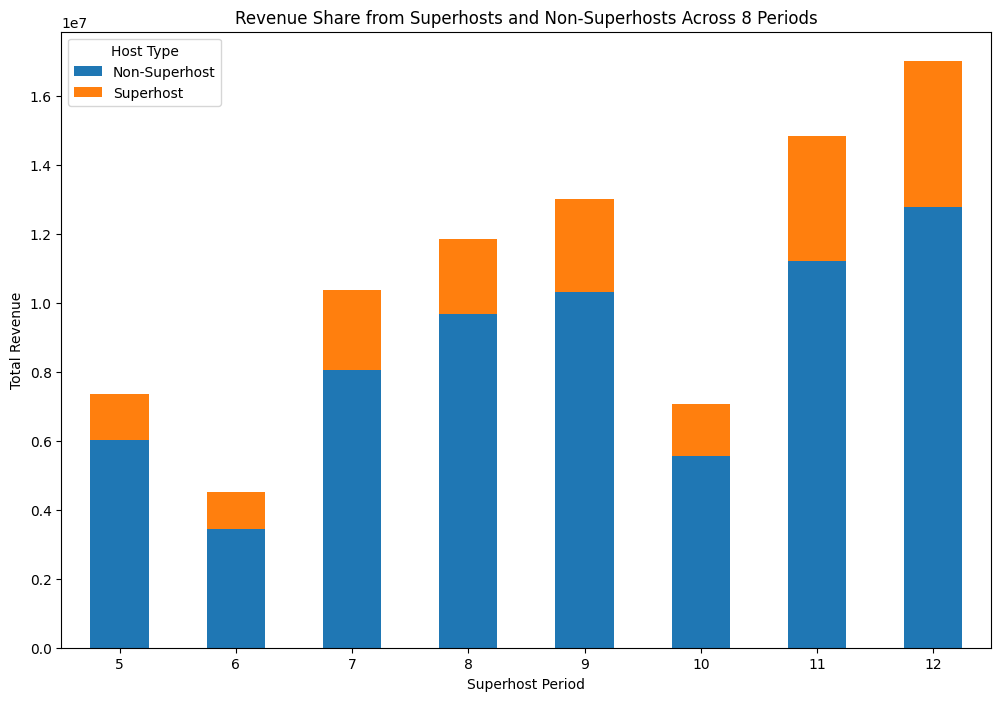

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('airbnb_Boston_rawdata - Revenue.csv')

# Replace missing values in 'revenue' with 0 or an appropriate value
df['revenue'] = df['revenue'].fillna(0)

# Group by 'superhost_period_all' and 'host_is_superhost_in_period', then sum the revenue
grouped_revenue = df.groupby(['superhost_period_all', 'host_is_superhost_in_period'])['revenue'].sum().reset_index()

# Pivot the table to get the desired wide format
pivot_revenue = grouped_revenue.pivot_table(index='superhost_period_all', columns='host_is_superhost_in_period', values='revenue', fill_value=0)

# Rename the columns for clarity
pivot_revenue.columns = ['Revenue_Non_Superhost', 'Revenue_Superhost']

# Plotting the stacked bar chart
pivot_revenue.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Revenue Share from Superhosts and Non-Superhosts Across 8 Periods')
plt.xlabel('Superhost Period')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.legend(title='Host Type', labels=['Non-Superhost', 'Superhost'])
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv('airbnb_Boston_rawdata - Revenue.csv')

# Define the continuous, categorical, and binary variables as per the user's instructions
continuous_vars = ['booked_days', 'booked_days_avePrice', 'available_days_aveListedPrice', 'Bedrooms',
                   'available_days', 'Number of Reviews', 'Nightly Rate', 'prev_num_5_star_Rev_pastYear',
                   'Max Guests', 'Bathrooms', 'occupancy_rate', 'numReservedDays_pastYear', 'numReserv_pastYear',
                   'rating_ave_pastYear', 'num_days_as_superhost', 'Cleaning Fee (USD)', 'numReviews_pastYear',
                   'Rating Overall']
categorical_vars = ['Property Type', 'Listing Type']
binary_vars = ['Pets Allowed', 'prev_host_is_superhost_in_period', 'prev_host_is_superhost', 'Superhost',
               'Instantbook Enabled']

# Replace missing values in continuous variables with their median
for var in continuous_vars:
    data[var].fillna(data[var].median(), inplace=True)

# Replace missing values in categorical variables with their mode
for var in categorical_vars:
    data[var].fillna(data[var].mode()[0], inplace=True)

# Prepare the data for linear regression
X = data[continuous_vars + categorical_vars + binary_vars]
y = data['revenue2']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, columns=categorical_vars, drop_first=True)

# Aggregate the data at the Airbnb Host ID level
grouped_data = X.groupby(data['Airbnb Host ID']).agg({
    'booked_days': 'sum',
    'booked_days_avePrice': 'mean',
    'available_days_aveListedPrice': 'mean',
    'Bedrooms': 'mean',
    'available_days': 'sum',
    'Number of Reviews': 'sum',
    'Nightly Rate': 'mean',
    'prev_num_5_star_Rev_pastYear': 'sum',
    'Max Guests': 'mean',
    'Bathrooms': 'mean',
    'occupancy_rate': 'mean',
    'rating_ave_pastYear': 'mean',
    'Cleaning Fee (USD)': 'mean',
    'Rating Overall': 'mean',
    'numReservedDays_pastYear': 'sum',
    'numReserv_pastYear': 'sum',
    'num_days_as_superhost': 'sum',
    'numReviews_pastYear': 'sum',
}).reset_index()

# For binary and categorical variables, take the mode of the highest repeating class
for var in binary_vars:
    mode_values = data.groupby('Airbnb Host ID')[var].agg(lambda x: x.mode()[0])
    grouped_data = grouped_data.join(mode_values, on='Airbnb Host ID')

# Aggregate target variable
grouped_y = data.groupby('Airbnb Host ID')['revenue2'].mean()

# Linear Regression Model
model = LinearRegression()
model.fit(grouped_data, grouped_y)

# Model evaluation
y_pred = model.predict(grouped_data)
mse = mean_squared_error(grouped_y, y_pred)
r2 = r2_score(grouped_y, y_pred)

model2 = sm.OLS(grouped_y, y_pred).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:               revenue2   R-squared (uncentered):                   0.799
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                              9969.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):                        0.00
Time:                        20:14:49   Log-Likelihood:                         -23367.
No. Observations:                2516   AIC:                                  4.674e+04
Df Residuals:                    2515   BIC:                                  4.674e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------